# LSTM Autoencoder example with MNIST dataset

In [2]:
#import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Load data

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('MNIST_data', one_hot=True)

print('dataset info')
print('training set:   {}'.format(len(data.train.labels)))
print('test set:       {}'.format(len(data.test.labels)))
print('validation set: {}'.format(len(data.validation.labels)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
dataset info
training set:   55000
test set:       10000
validation set: 5000


# LSTM Autoencoder model

https://stackoverflow.com/questions/44647258/lstm-autoencoder

In [4]:
from LSTMAutoencoder import LSTMAutoencoder

hidden_num = 500

input_time_size = 28
input_frequency_size = 28
step_num = 28
batch_size = 100

X = tf.placeholder("float", [batch_size, input_time_size, input_frequency_size])

p_inputs = [tf.squeeze(t, [1]) for t in tf.split(X, step_num, 1)]

cell = tf.contrib.rnn.LSTMCell(hidden_num, use_peepholes=True)

ae = LSTMAutoencoder(hidden_num, p_inputs, cell=cell,  reverse=True, decode_without_input=True)

In [7]:
# Initialize the variables (i.e. assign their default value)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

num_train = len(data.train.labels)
training_steps = 25*int(num_train/batch_size)
display_step = 0.1*training_steps

print('training_steps: ', training_steps)
for step in range(1, training_steps+1):
    batch_x, batch_y = data.train.next_batch(batch_size)
    # Reshape data to get 28 seq of 28 elements
    batch_x = batch_x.reshape((batch_size, input_time_size, input_frequency_size))
    loss, _ = sess.run([ae.loss, ae.train], {X: batch_x})
    if step % display_step == 0 or step == 1:
        # Calculate batch loss and accuracy 
        print("step %d:" % (step), loss)

training_steps:  55000
step 1: 0.112041
step 5500: 0.00732763
step 11000: 0.00520713
step 16500: 0.00374309
step 22000: 0.00301539
step 27500: 0.00224346
step 33000: 0.00204679
step 38500: 0.00153653
step 44000: 0.00129561
step 49500: 0.00113904
step 55000: 0.00112153


Original Images


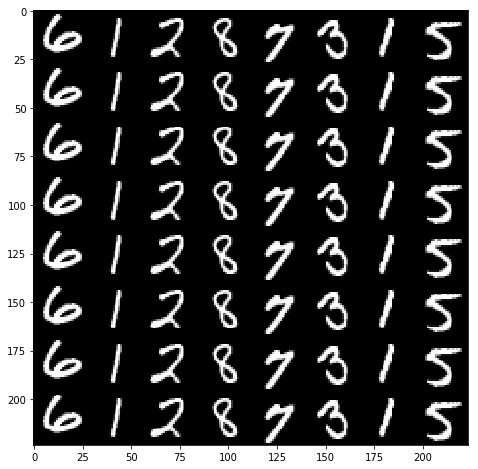

Reconstructed Images


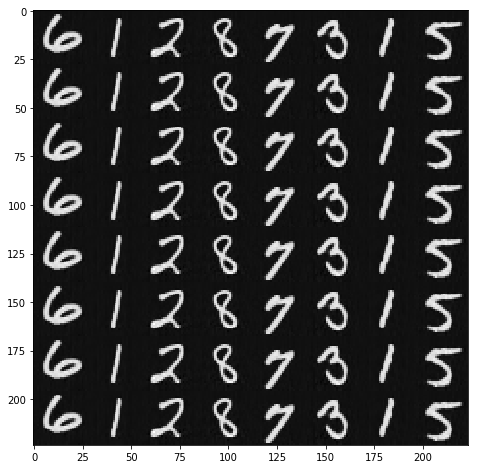

In [10]:
batch_x, _ = data.test.next_batch(batch_size)
batch_x = batch_x.reshape((batch_size, input_time_size, input_frequency_size))

input_, output_ =  sess.run([ae.input_, ae.output_], {X:batch_x})

n = 8
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # Display original images
    for j in range(n):
        # Draw the original digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = input_[j, :, :]
    # Display reconstructed images
    for j in range(n):
        # Draw the reconstructed digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = output_[j, :, :]

print("Original Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()